# Hello World (MNIST recognition)


Trying to learn about AI in general and Tensorflow. I have followed a couple of tutorials ai with pytorch. 


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.version)

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/version/__init__.py'>


## Data
At first I need to load everything. The mnist data is included with the keras api, or at least it can be downloaded.




In [4]:
mnist = tf.keras.datasets.mnist
(train_input, train_out), (test_input, test_out) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Inspecting the data:

In [5]:
# print(train_input[0])
# print("Result is {}".format(train_out[0]))
print("There are {} images in the dataset.".format(len(train_input)))
print("The image shape is : {} ".format(train_input[0].shape))

There are 60000 images in the dataset.
The image shape is : (28, 28) 


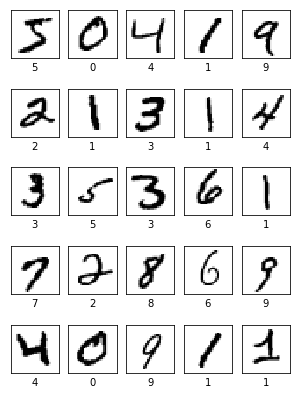

In [6]:
plt.figure(figsize=(5,7))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(train_input[i], cmap=plt.cm.binary)
  plt.xlabel(train_out[i])
  plt.xticks([])
  plt.yticks([])
  
plt.show()

Okay looks good to me ! Labels match. Images look as expected.
Time to try and build a very simple network.

In [0]:
train_input = train_input/255 # scale to range between (0,1)
test_input = test_input/255

In [8]:
network = tf.keras.Sequential()
network.add(tf.keras.layers.Flatten(input_shape=(28,28)))
network.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))  # the 100 is just arbitrary testing value
network.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)) # sigmoid here in order to get the confidence of the system
network.summary()

network.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Training

In [9]:
network.fit(train_input, train_out, epochs=5)
network.evaluate(test_input, test_out)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2918 - acc: 0.9192
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1319 - acc: 0.9614
Epoch 3/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0961 - acc: 0.9714
Epoch 4/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0732 - acc: 0.9785
Epoch 5/5
10000/10000 [==============================] - 1s 51us/sample - loss: 0.0887 - acc: 0.9719


[0.08868148372899741, 0.9719]

In [20]:

predictions = network.predict(test_input[0:4])
for p, o in zip(predictions, test_out[0:4]):
  print(p)
  r = np.argmax(p)
  print(r)
  print(p[r])
  print(o)


[4.1723251e-07 0.0000000e+00 4.6193600e-06 9.8019838e-05 0.0000000e+00
 6.7949295e-06 0.0000000e+00 4.3201804e-01 5.6028366e-06 2.3543835e-06]
7
0.43201804
7
[0.0000000e+00 7.0363283e-05 7.3626816e-01 7.9244375e-05 0.0000000e+00
 7.3015690e-06 2.9802322e-08 0.0000000e+00 5.0663948e-07 0.0000000e+00]
2
0.73626816
2
[2.6524067e-06 2.6459634e-01 2.3677945e-04 2.6762486e-05 9.2089176e-06
 6.4671040e-06 1.0788441e-05 9.1761351e-05 2.8482080e-04 5.9604645e-07]
1
0.26459634
1
[2.7334243e-02 0.0000000e+00 9.2387199e-07 8.9406967e-08 0.0000000e+00
 1.1920929e-07 5.9604645e-08 8.9406967e-08 0.0000000e+00 0.0000000e+00]
0
0.027334243
0


Really interesting to look at. The network is not very confident in its results. Even tho the accuracy is really good. It predict the correct result in 97% of cases but the results are super unconfident. I think a clearer result would be better. 